In [14]:
import numpy as np
import matplotlib.pyplot as plt

num_qubit_list = [7]

shotlist = [2**20]
num_shot_label = [r"$2^{20}$"]
linestylelist = ['--']
markerlist = ['o']

for num_qubits in num_qubit_list:
    FD_trace = []
    FD_l2 = []
    FD_evs = []
    
    SD_trace = []
    SD_l2 = []
    SD_evs = []
    
    classical_trace = []
    classical_l2 = []
    classical_evs = []
    
    with open(f"log/evs_log_FD_LNN_{num_qubits}_1048576.txt", 'r') as file:
        for line in file:
            FD_evs.append(np.float64(line))
    with open(f"log/trace_log_FD_LNN_{num_qubits}_1048576.txt", 'r') as file:
        for line in file:
            FD_trace.append(np.float64(line))
    with open(f"log/l2_log_FD_LNN_{num_qubits}_1048576.txt", 'r') as file:
        for line in file:
            FD_l2.append(np.float64(line))
            
    with open(f"log/evs_log_SD_{num_qubits}_1048576.txt", 'r') as file:
        for line in file:
            SD_evs.append(np.float64(line))
    with open(f"log/trace_log_SD_{num_qubits}_1048576.txt", 'r') as file:
        for line in file:
            SD_trace.append(np.float64(line))
    with open(f"log/l2_log_SD_{num_qubits}_1048576.txt", 'r') as file:
        for line in file:
            SD_l2.append(np.float64(line))
            
    with open(f"classical_optimization/log/cost_log.txt", 'r') as file:
        for line in file:
            classical_evs.append(np.float64(line))
    with open(f"classical_optimization/log/trace_log.txt", 'r') as file:
        for line in file:
            classical_trace.append(np.float64(line))
    with open(f"classical_optimization/log/l2_log.txt", 'r') as file:
        for line in file:
            classical_l2.append(np.float64(line))

    max_iter = np.max([len(FD_trace), len(SD_trace)])

    plt.figure(figsize = (12,9))
    plt.plot(SD_l2, label = "SD", color = 'red', linewidth = 10)
    plt.plot(FD_l2, label = "FD", color = 'green', linewidth = 10)
    plt.plot(classical_l2[:max_iter], label = "Classical", color = 'black', linewidth = 10)
    plt.ylabel(r"$L_2$-norm error $\left(\log_{10}\right)$", fontsize = 40)
    plt.xlabel("Iterations", fontsize = 40)
    plt.xticks(fontsize = 35)
    plt.yticks(fontsize = 35)
    plt.legend(fontsize = 35, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('history/l2_history.png', dpi = 200, transparent = True)
    plt.close()

    plt.figure(figsize = (12,9))
    plt.plot(SD_trace, label = "SD", color = 'red', linewidth = 10)
    plt.plot(FD_trace, label = "FD", color = 'green', linewidth = 10)
    plt.plot(classical_trace[:max_iter], label = "Classical", color = 'black', linewidth = 10)
    plt.ylabel(r"Trace Distance", fontsize = 40)
    plt.xlabel("Iterations", fontsize = 40)
    plt.xticks(fontsize = 35)
    plt.yticks(fontsize = 35)
    plt.legend(fontsize = 35, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('history/trace_history.png', dpi = 200, transparent = True)
    plt.close()

    plt.figure(figsize = (12,9))
    plt.plot(SD_evs, label = "SD", color = 'red', linewidth = 10)
    plt.plot(FD_evs, label = "FD", color = 'green', linewidth = 10)
    plt.plot(classical_evs[:max_iter], label = "Classical", color = 'black', linewidth = 10)
    plt.ylabel(r"Cost Function", fontsize = 40)
    plt.xlabel("Iterations", fontsize = 40)
    plt.xticks(fontsize = 35)
    plt.yticks(fontsize = 35)
    plt.legend(fontsize = 35, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('history/evs_history.png', dpi = 200, transparent = True)
    plt.close()

In [ ]:
nqubitlist = [7,9,11]
depthlist = [3, 4, 6]
# max_iter = [42, 44, 54]
shotlist = [1048576]
maxiter = 55

for (num_qubits, depth, sol) in zip(nqubitlist, depthlist, sol_list):
    param_list_classical = []
    psi_list_classical = []
    with open(f'params_classical_{num_qubits}.txt', 'r') as file:
        linenum = 0
        for line in file:
            param_list_classical.append(np.array([np.float64(x) for x in line.strip().split()]))
    linenum = 0
    for params in param_list_classical:
        psi = make_classical_psi(params, num_qubits, depth)
        psi_list_classical.append(psi)
        linenum += 1
        if linenum == maxiter:
            break
    with open(f"psi_log_classical_{num_qubits}.csv", "w", newline="") as f:
        writer = csv.writer(f)
        for arr in psi_list_classical:
            writer.writerow(arr)

In [4]:
nqubitlist = [7,9,11]
depthlist = [3, 4, 6]
shotlist = [524288, 1048576]

def extract_evs(method, num_qubits, num_shots, classical = False):
    if classical == False:
        evs_list = []
        
        filename = "evs_log_"+ method + f"_{num_qubits}" + f"_{num_shots}.txt"
        with open(filename, 'r') as file:
            linenum = 0
            for line in file:
                list = [np.float64(x) for x in line.strip().split()]
                evs_list.append(list[0])
        return evs_list
    else:
        evs_list = []
        
        filename = "evs_log_classical"+ f"_{num_qubits}.txt"
        with open(filename, 'r') as file:
            linenum = 0
            for line in file:
                list = [np.float64(x) for x in line.strip().split()]
                evs_list.append(list[0])
        return evs_list
        

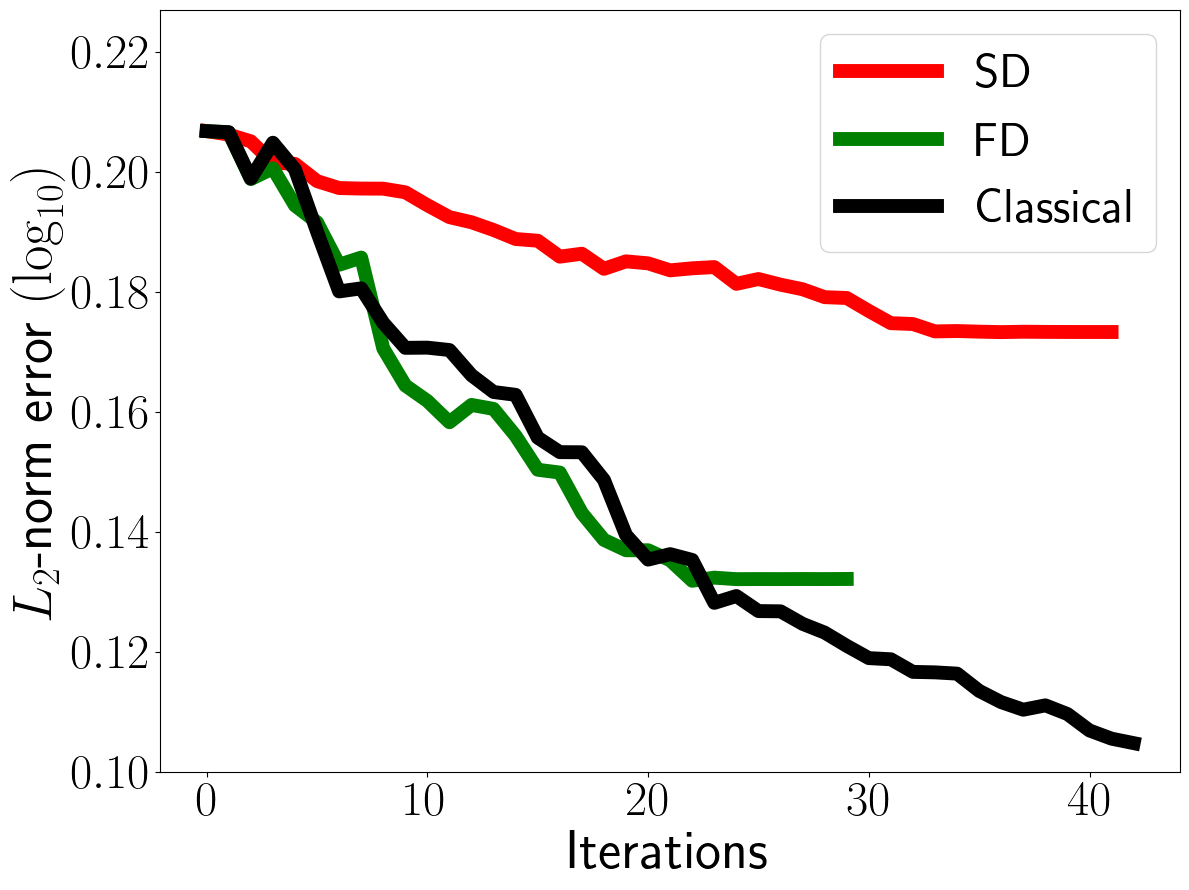

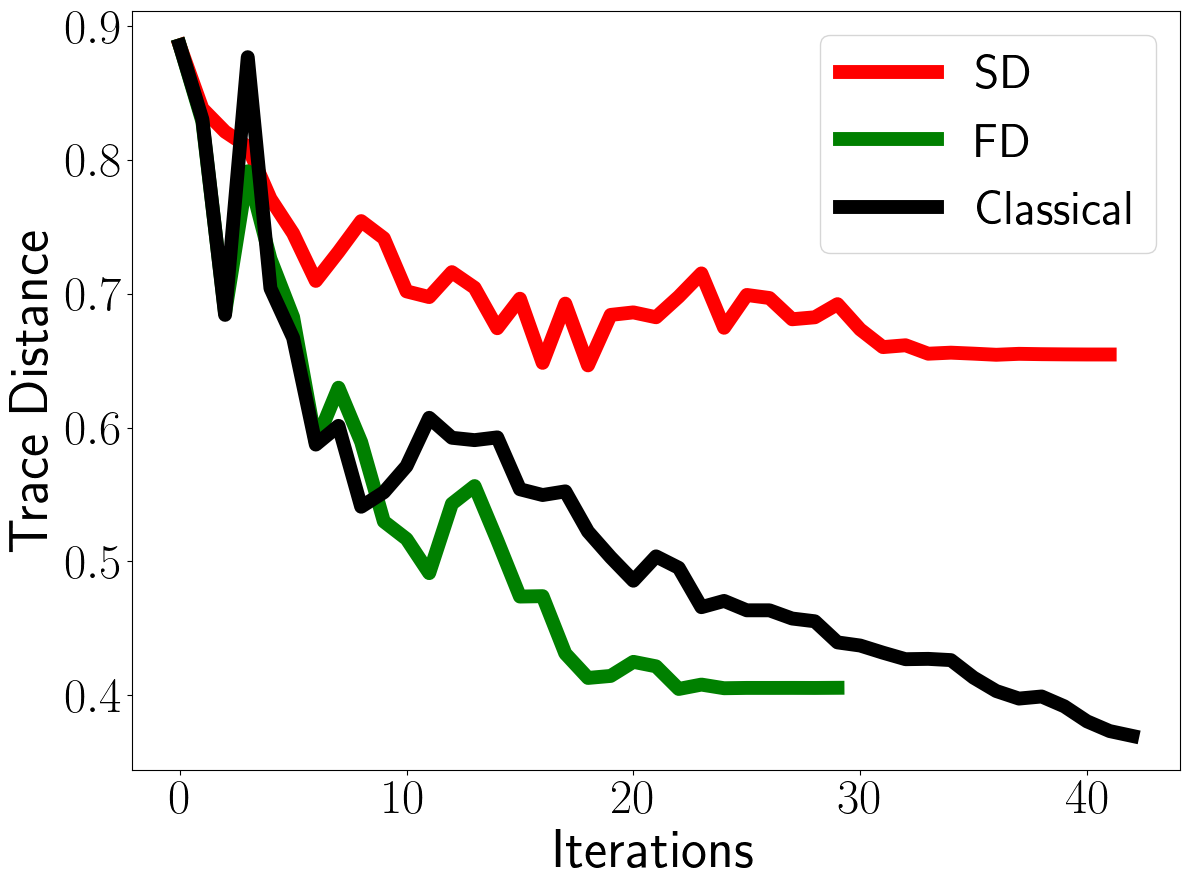

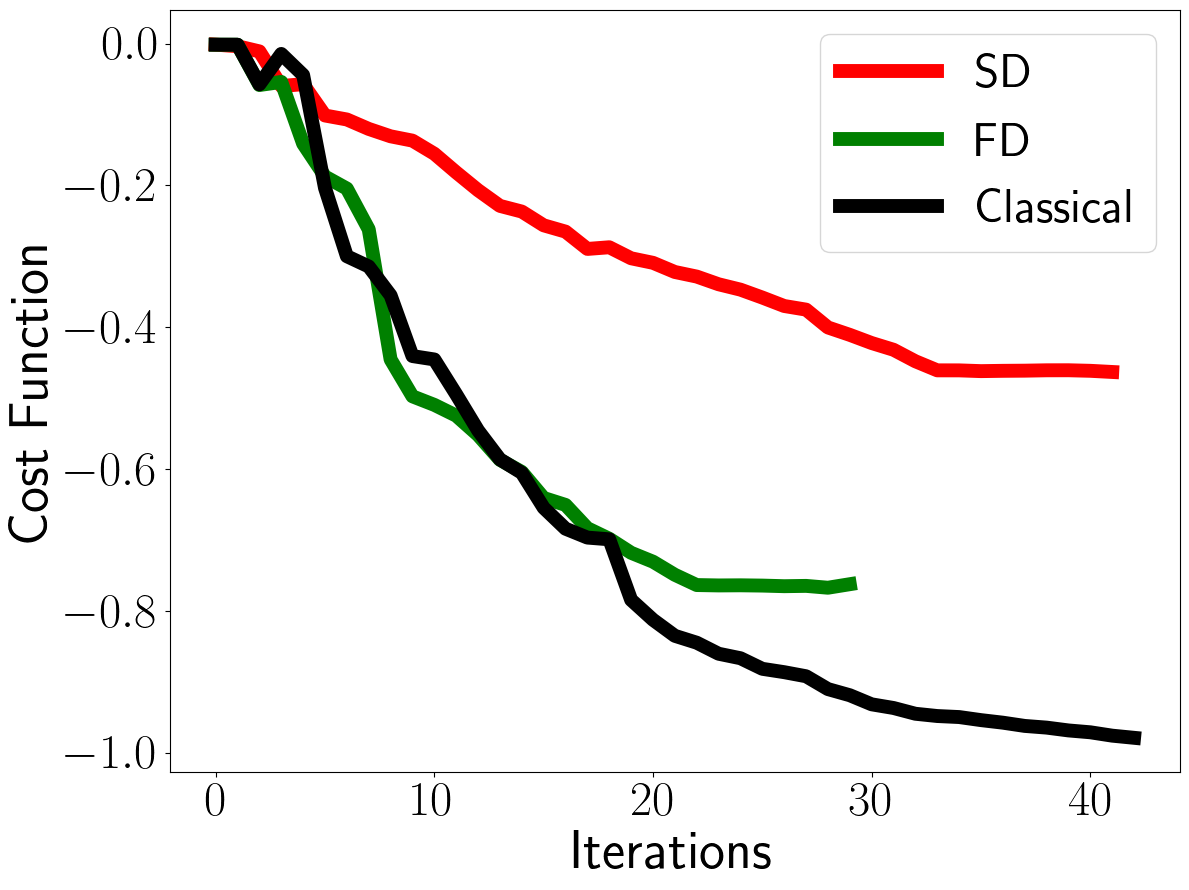

In [36]:
shotlist = [2**20]
# num_shot_label = [r"$2^{19}$", r"$2^{20}$"]
# linestylelist = [None, '--']
# markerlist = ['o', 's']
num_shot_label = [r"$2^{20}$"]
linestylelist = ['--']
markerlist = ['o']
ylimdict_l2 = {
    7: [0.1, 0.227],
    9: None,
    11: None
}
ylimdict_trace = {
    7:None,
    9: None,
    11: None
}
ylimdict_evs = {
    7: None,
    9: None,
    11: None
}
xlimdict_evs = {
    7: None,
    9: None,
    11: None
}

for num_qubits in [7]:
    plt.figure(figsize = (12,9))
    for (num_shots, shot_label, linestyle,marker) in zip(shotlist, num_shot_label, linestylelist, markerlist):
        l2_list_choi_7 = np.loadtxt(f"l2_log_choi_{num_qubits}_{num_shots}.csv", delimiter=',')
        l2_list_dy_7 = np.loadtxt(f"l2_log_dy_{num_qubits}_{num_shots}.csv", delimiter=',')
        l2_list_classical = np.loadtxt(f"l2_log_classical_{num_qubits}.csv", delimiter=',')
        
        # plt.plot(l2_list_choi_7, label = "SD, shots = " +shot_label, color = 'red', linestyle = linestyle, marker =marker, markersize = 7, linewidth = 2)
        # plt.plot(l2_list_dy_7, label = "FD, shots = " +shot_label, color = 'green', linestyle = linestyle, marker =marker, markersize = 7, linewidth = 2)
        plt.plot(l2_list_choi_7, label = "SD", color = 'red', linewidth = 10)
        plt.plot(l2_list_dy_7, label = "FD", color = 'green', linewidth = 10)
    plt.plot(l2_list_classical[:43], label = "Classical", color = 'black', linewidth = 10)
    plt.ylabel(r"$L_2$-norm error $\left(\log_{10}\right)$", fontsize = 40)
    plt.xlabel("Iterations", fontsize = 40)
    plt.xticks(fontsize = 35)
    plt.yticks(fontsize = 35)
    if ylimdict_l2[num_qubits] is not None:
        plt.ylim(*ylimdict_l2[num_qubits])
    plt.legend(fontsize = 35, loc = 'upper right')
    plt.tight_layout()
    # plt.savefig('C:/Users/MPMC/Pictures/Screenshots/l2normm.png', dpi = 200, transparent = True)
    plt.savefig('C:/Users/MPMC/Desktop/Q-PDE Innovators/VQA_POISSON/VQA_POISSON/figures/l2normm.png', dpi = 200, transparent = True)
    plt.show()
    
    plt.figure(figsize = (12,9))
    for (num_shots, shot_label, linestyle,marker) in zip(shotlist, num_shot_label, linestylelist, markerlist):
        trace_list_choi_7 = np.loadtxt(f"trace_log_choi_{num_qubits}_{num_shots}.csv", delimiter=',')
        trace_list_dy_7 = np.loadtxt(f"trace_log_dy_{num_qubits}_{num_shots}.csv", delimiter=',')
        trace_list_classical = np.loadtxt(f"trace_log_classical_{num_qubits}.csv", delimiter=',')
        
        # plt.plot(trace_list_choi_7, label = "SD, shots = " +shot_label, color = 'red', linestyle = linestyle, marker =marker, markersize = 7, linewidth = 2)
        # plt.plot(trace_list_dy_7, label = "FD, shots = " +shot_label, color = 'green', linestyle = linestyle, marker =marker, markersize = 7, linewidth = 2)
        plt.plot(trace_list_choi_7, label = "SD", color = 'red', linewidth = 10)
        plt.plot(trace_list_dy_7, label = "FD", color = 'green', linewidth = 10)
    plt.plot(trace_list_classical[:43], label = "Classical", color = 'black', linewidth = 10)
        
    plt.ylabel(r"Trace Distance", fontsize = 40)
    plt.xlabel("Iterations", fontsize = 40)
    plt.xticks(fontsize = 35)
    plt.yticks(fontsize = 35)
    if ylimdict_trace[num_qubits] is not None:
        plt.ylim(*ylimdict_trace[num_qubits])
    plt.legend(fontsize = 35, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('C:/Users/MPMC/Desktop/Q-PDE Innovators/VQA_POISSON/VQA_POISSON/figures/tracedistancee.png', dpi = 200, transparent = True)
    plt.show()
    
    plt.figure(figsize = (12,9))
    for (num_shots, shot_label, linestyle,marker) in zip(shotlist, num_shot_label, linestylelist, markerlist):
        evs_list_choi_7 = extract_evs("choi", num_qubits, num_shots)
        evs_list_dy_7 = extract_evs("dy", num_qubits, num_shots)
        evs_list_classical = extract_evs("dy", num_qubits, num_shots, classical = True)
        # plt.plot(evs_list_choi_7, label = "SD, shots = " +shot_label, color = 'red', linestyle = linestyle, marker =marker, markersize = 7, linewidth = 2)
        # plt.plot(evs_list_dy_7, label = "FD, shots = " +shot_label, color = 'green', linestyle = linestyle, marker =marker, markersize = 7, linewidth = 2)
        plt.plot(evs_list_choi_7, label = "SD", color = 'red', linewidth = 10)
        plt.plot(evs_list_dy_7, label = "FD", color = 'green', linewidth = 10)
    plt.plot(evs_list_classical[:43], label = "Classical", color = 'black', linewidth = 10)
    plt.ylabel(r"Cost Function", fontsize = 40)
    plt.xlabel("Iterations", fontsize = 40)
    plt.xticks(fontsize = 35)
    plt.yticks(fontsize = 35)
    if ylimdict_evs[num_qubits] is not None:
        plt.ylim(*ylimdict_evs[num_qubits])
    # if xlimdict_evs[num_qubits] is not None:
    #     plt.xlim(*xlimdict_evs[num_qubits])
    plt.legend(fontsize = 35, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('C:/Users/MPMC/Desktop/Q-PDE Innovators/VQA_POISSON/VQA_POISSON/figures/evss.png', dpi = 200, transparent = True)
    # plt.savefig('C:/Users/MPMC/Pictures/Screenshots/evss.png', dpi = 200, transparent = True)
    plt.show()

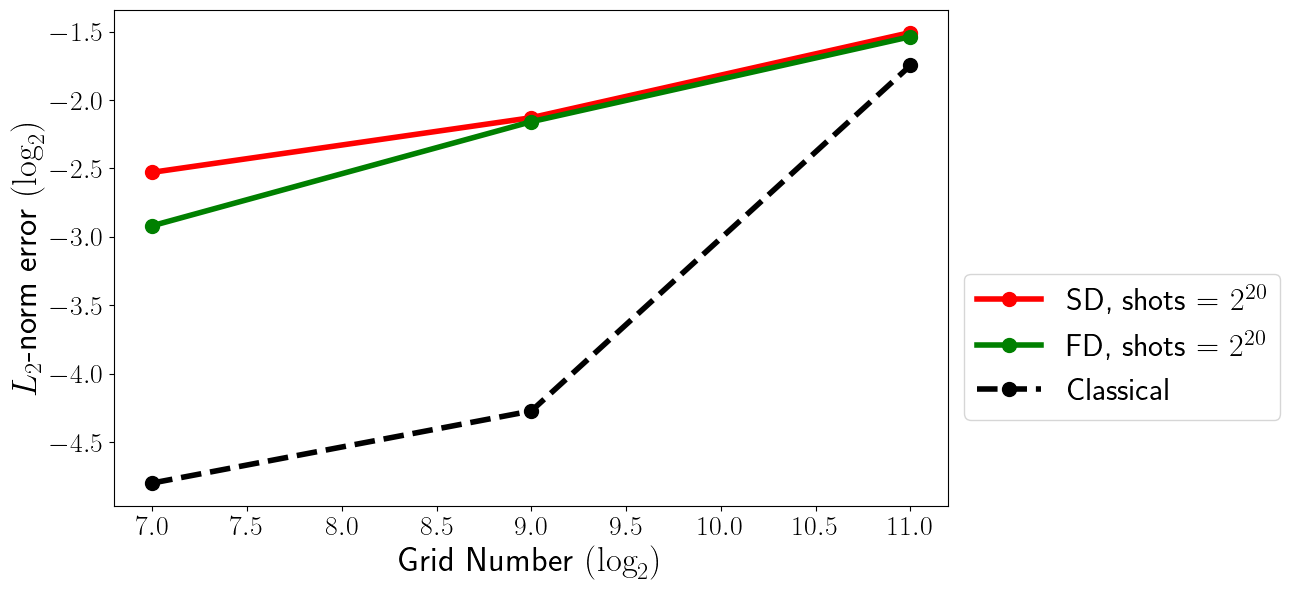

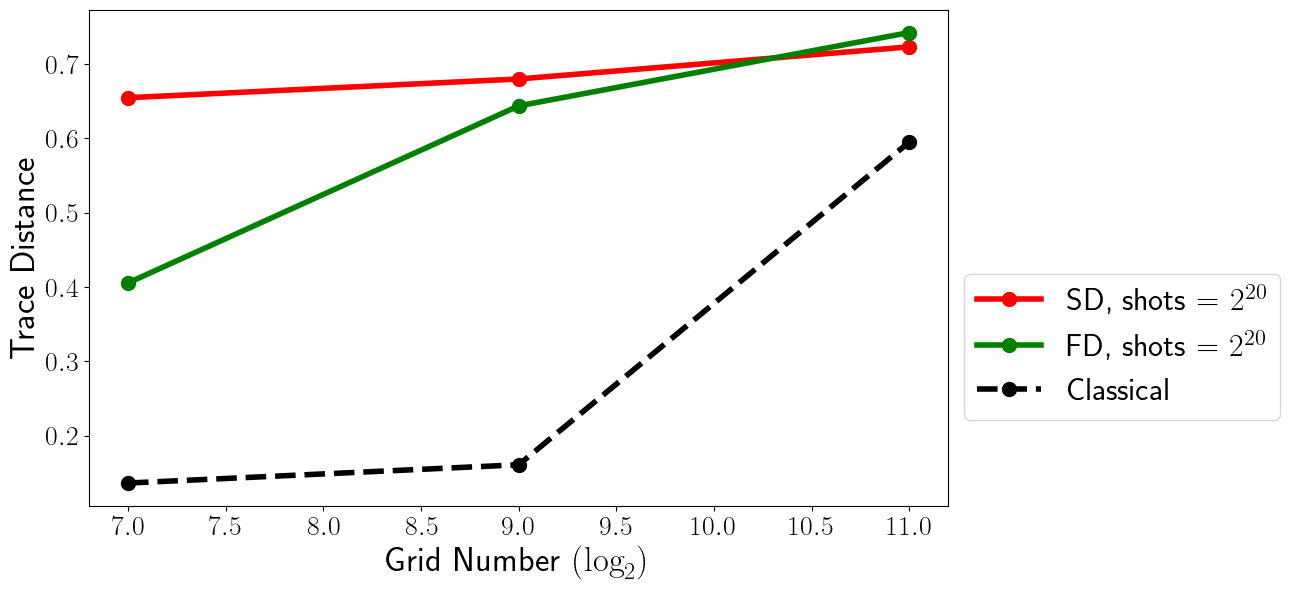

In [87]:
nqubitlist = [7,9,11]
def convergence(trace_or_l2, num_shots):
    list_to_plot_choi = []
    list_to_plot_dy = []
    
    list_to_plot_choi.append(np.loadtxt(trace_or_l2+f"_log_choi_7_{num_shots}.csv", delimiter=',')[-1])
    list_to_plot_choi.append(np.loadtxt(trace_or_l2+f"_log_choi_9_{num_shots}.csv", delimiter=',')[-1])
    list_to_plot_choi.append(np.loadtxt(trace_or_l2+f"_log_choi_11_{num_shots}.csv", delimiter=',')[-1])
    
    list_to_plot_dy.append(np.loadtxt(trace_or_l2+f"_log_dy_7_{num_shots}.csv", delimiter=',')[-1])
    list_to_plot_dy.append(np.loadtxt(trace_or_l2+f"_log_dy_9_{num_shots}.csv", delimiter=',')[-1])
    list_to_plot_dy.append(np.loadtxt(trace_or_l2+f"_log_dy_11_{num_shots}.csv", delimiter=',')[-1])
    
    
    # 임시방편
    # trace_13_dy = 0.89760295469329
    # l2_13_dy = 0.5077404202625273
    
    # trace_13_choi = 0.823723310076794
    # l2_13_choi = 0.5066910900087858
    
    # if trace_or_l2 == "trace":
    #     list_to_plot_choi.append(trace_13_choi)
    #     list_to_plot_dy.append(trace_13_dy)
    # else:
    #     list_to_plot_choi.append(l2_13_choi)
    #     list_to_plot_dy.append(l2_13_dy)
        
    return (np.array(list_to_plot_choi), np.array(list_to_plot_dy))

grid_list = 2**np.array(nqubitlist)
num_shot_label = [r"$2^{20}$"]
shotlist = [2**20]
linestylelist = [None, '--']
markerlist = ['o', 's']

time_SD = np.array([1847.24, 4031.24, 10941.50])
time_FD = np.array([787.62, 1735.98, 4695.82])

plt.figure(figsize = (13,6))
for (num_shots, shotlabel, linestyle,marker) in zip(shotlist, num_shot_label, linestylelist, markerlist):
    l2choi, l2dy = convergence("l2", num_shots)
    plt.plot(np.log2(grid_list), np.log2(l2choi), label = "SD, shots = " +shotlabel, color = 'red', linestyle = linestyle, marker =marker, markersize = 10, linewidth = 4)
    plt.plot(np.log2(grid_list), np.log2(l2dy), label = "FD, shots = " +shotlabel, color = 'green', linestyle = linestyle, marker =marker, markersize = 10, linewidth = 4)
plt.plot(np.log2(grid_list), np.log2(np.array(opt_l2_list)), label = "Classical", color = 'black', linestyle = '--', marker ='o', markersize = 10, linewidth = 4)
plt.ylabel(r"$L_2$-norm error $\left(\log_{2}\right)$", fontsize = 25)
plt.xlabel(r"Grid Number $\left(\log_{2}\right)$", fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 23, bbox_to_anchor = (1,0.5))
plt.tight_layout()
# plt.savefig('C:/Users/MPMC/Pictures/Screenshots/l2conv.png', dpi = 200, transparent = True)
plt.show()
plt.figure(figsize = (13,6))
for (num_shots, shotlabel, linestyle,marker) in zip(shotlist, num_shot_label, linestylelist, markerlist):
    tracechoi, tracedy = convergence("trace", num_shots)
    plt.plot(np.log2(grid_list), tracechoi, label = "SD, shots = " +shotlabel, color = 'red', linestyle = linestyle, marker =marker, markersize = 10, linewidth = 4)
    plt.plot(np.log2(grid_list), tracedy, label = "FD, shots = " +shotlabel, color = 'green', linestyle = linestyle, marker =marker, markersize = 10, linewidth = 4)
plt.plot(np.log2(grid_list), np.array(opt_trace_list), label = "Classical", color = 'black', linestyle = '--', marker ='o', markersize = 10, linewidth = 4)
plt.ylabel(r"Trace Distance", fontsize = 25)
plt.xlabel(r"Grid Number $\left(\log_{2}\right)$", fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 23, bbox_to_anchor = (1,0.5))
plt.tight_layout()
# plt.savefig('C:/Users/MPMC/Pictures/Screenshots/traceconv.png', dpi = 200, transparent = True)
plt.show()

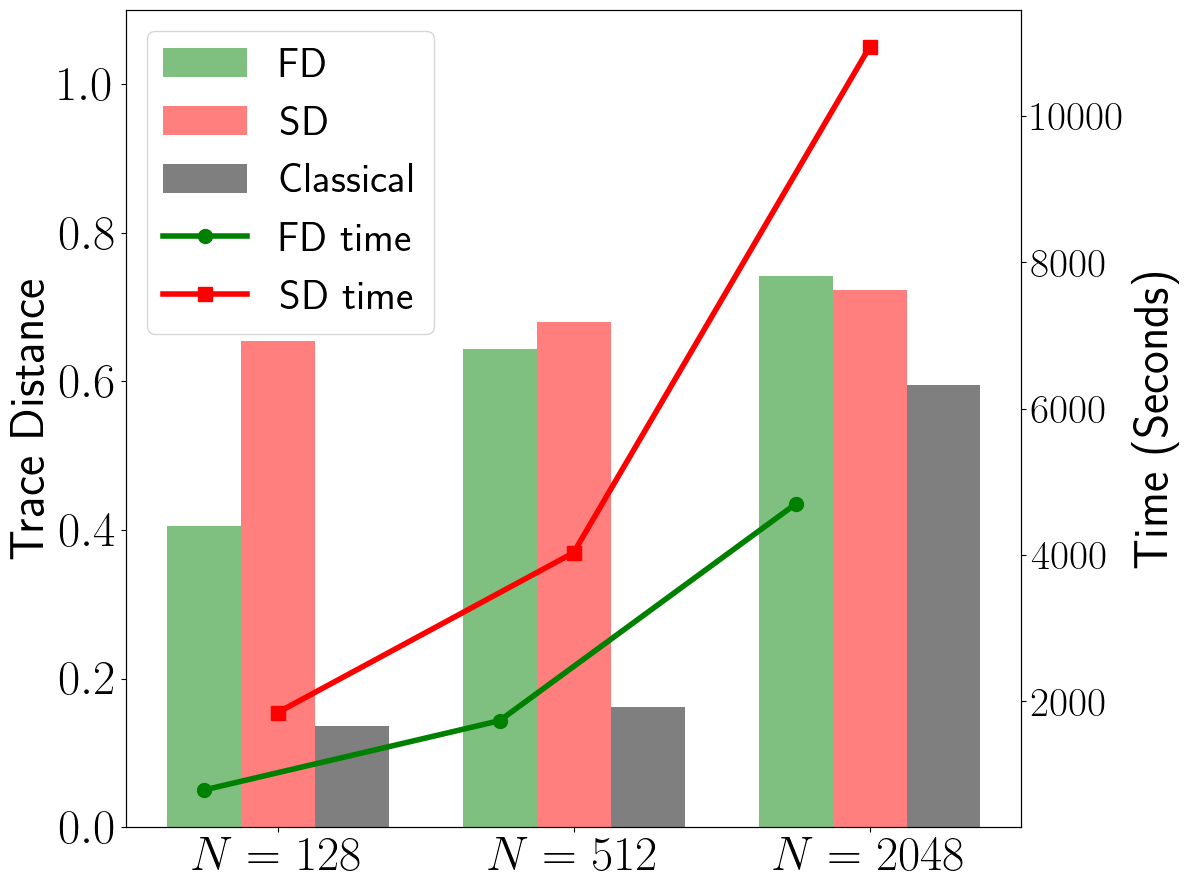

In [101]:
import numpy as np
import matplotlib.pyplot as plt

methods = ["FD", "SD", "Classical"]
colors = ["green", "red", "black"]
N_vals = [128, 512, 2048]
x = np.arange(len(N_vals))
bar_width = 0.25
alpha = 0.5
# ---- 데이터 (실제 값으로 대체) ----
# l2dy, l2choi, opt_l2_list: 각 N별 L2 error
# time_FD, time_SD: 각 N별 Time 값

# ---- 플롯 ----
fig, ax1 = plt.subplots(figsize=(12,9))

# (왼쪽 y축) L2 error bars
ax1.bar(x - bar_width, tracedy,         width=bar_width, color="green",  label="FD", alpha = alpha)
ax1.bar(x,             tracechoi,       width=bar_width, color="red",    label="SD", alpha = alpha)
ax1.bar(x + bar_width, opt_trace_list,  width=bar_width, color="black",  label="Classical", alpha = alpha)
ax1.set_ylabel(r"Trace Distance", fontsize=35)
ax1.tick_params(labelsize = 35)
ax1.set_ylim(0,1.1)

# (오른쪽 y축) Time plot → 각 method 위치에 맞춰서
ax2 = ax1.twinx()
ax2.plot(x - bar_width, time_FD, marker="o", color="green", label="FD time", markersize = 10, linewidth = 4)
ax2.plot(x,             time_SD, marker="s", color="red", label="SD time", markersize = 10, linewidth = 4)
ax2.set_ylabel("Time (Seconds)", fontsize=35)
ax2.tick_params(labelsize = 30)

# x축 라벨
ax1.set_xticks(x)
ax1.set_xticklabels([f"$N={n}$" for n in N_vals], fontsize=35)

# 범례 합치기
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, fontsize=30, loc = 'upper left')

plt.tight_layout()
plt.savefig('C:/Users/MPMC/Desktop/Q-PDE Innovators/VQA_POISSON/VQA_POISSON/figures/time.png', dpi = 200, transparent = True)
plt.show()
